In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

import requests
from config import weather_api_key

import time
from datetime import datetime

from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

609

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quelimane
Processing Record 2 of Set 1 | fort nelson
Processing Record 3 of Set 1 | itaberaba
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | portree
Processing Record 6 of Set 1 | wynyard
Processing Record 7 of Set 1 | ocos
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | emilio carranza
Processing Record 10 of Set 1 | khanpur
Processing Record 11 of Set 1 | portland
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | sorvag
City not found. Skipping...
Processing Record 16 of Set 1 | srednekolymsk
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | haines junction
Processing Record 20 of Set 1 | narsaq
Processing Record 21 of Set 1 | bambous virieux


Processing Record 36 of Set 4 | young
Processing Record 37 of Set 4 | saint george
Processing Record 38 of Set 4 | acapulco
Processing Record 39 of Set 4 | canutama
Processing Record 40 of Set 4 | constitucion
Processing Record 41 of Set 4 | moncagua
Processing Record 42 of Set 4 | shimoda
Processing Record 43 of Set 4 | ayagoz
Processing Record 44 of Set 4 | necochea
Processing Record 45 of Set 4 | sedelnikovo
City not found. Skipping...
Processing Record 46 of Set 4 | pringsewu
Processing Record 47 of Set 4 | kamina
Processing Record 48 of Set 4 | suoyarvi
Processing Record 49 of Set 4 | grindavik
Processing Record 50 of Set 4 | ati
Processing Record 1 of Set 5 | ajdabiya
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | ugoofaaru
Processing Record 4 of Set 5 | hualmay
Processing Record 5 of Set 5 | marcona
City not found. Skipping...
Processing Record 6 of Set 5 | ouadda
Processing Record 7 of Set 5 | chapais
Processing Record 8 of Set 5 | corcoran
Processing Re

City not found. Skipping...
Processing Record 28 of Set 8 | san quintin
Processing Record 29 of Set 8 | port hawkesbury
Processing Record 30 of Set 8 | swellendam
Processing Record 31 of Set 8 | khandbari
Processing Record 32 of Set 8 | araure
Processing Record 33 of Set 8 | bluffton
Processing Record 34 of Set 8 | mikuni
Processing Record 35 of Set 8 | san rafael
Processing Record 36 of Set 8 | dien bien
City not found. Skipping...
Processing Record 37 of Set 8 | avera
Processing Record 38 of Set 8 | arroyo
Processing Record 39 of Set 8 | batetskiy
Processing Record 40 of Set 8 | san jose de sisa
Processing Record 41 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 8 | rondonopolis
Processing Record 43 of Set 8 | bentiu
Processing Record 44 of Set 8 | husavik
Processing Record 45 of Set 8 | caxito
Processing Record 46 of Set 8 | paracatu
Processing Record 47 of Set 8 | kahului
Processing Record 48 of Set 8 | meleuz
Processing Record 49 of Set 8 | vao
Proces

Processing Record 15 of Set 12 | harrisburg
Processing Record 16 of Set 12 | caborca
Processing Record 17 of Set 12 | bukama
Processing Record 18 of Set 12 | kerteh
City not found. Skipping...
Processing Record 19 of Set 12 | bayanday
Processing Record 20 of Set 12 | abu dhabi
Processing Record 21 of Set 12 | mehamn
Processing Record 22 of Set 12 | krasnyy chikoy
Processing Record 23 of Set 12 | saint-georges
Processing Record 24 of Set 12 | san carlos de bariloche
Processing Record 25 of Set 12 | melo
Processing Record 26 of Set 12 | bonavista
Processing Record 27 of Set 12 | palaikastron
Processing Record 28 of Set 12 | hebi
Processing Record 29 of Set 12 | jamsa
Processing Record 30 of Set 12 | meadow lake
Processing Record 31 of Set 12 | labuhan
Processing Record 32 of Set 12 | watari
Processing Record 33 of Set 12 | huarmey
Processing Record 34 of Set 12 | mahon
Processing Record 35 of Set 12 | correntina
Processing Record 36 of Set 12 | rovaniemi
Processing Record 37 of Set 12 | 

In [7]:
len(city_data)

558

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Quelimane,-17.8786,36.8883,78.75,89,40,2.30,MZ,2021-11-22 00:42:05
1,Fort Nelson,58.8053,-122.7002,0.99,85,90,0.00,CA,2021-11-22 00:43:04
2,Itaberaba,-12.5275,-40.3069,75.22,66,63,3.04,BR,2021-11-22 00:39:54
3,Hobart,-42.8794,147.3294,67.05,61,40,1.01,AU,2021-11-22 00:43:05
4,Portree,57.4129,-6.1942,41.86,89,71,2.75,GB,2021-11-22 00:43:06
5,Wynyard,-41.0000,145.7167,64.98,51,13,7.56,AU,2021-11-22 00:43:06
6,Ocos,14.5094,-92.1933,84.70,77,15,4.81,GT,2021-11-22 00:43:07
7,Upernavik,72.7868,-56.1549,3.99,88,39,7.49,GL,2021-11-22 00:43:07
8,Emilio Carranza,19.9711,-96.6114,74.19,86,5,0.38,MX,2021-11-22 00:43:08
9,Khanpur,28.6453,70.6567,61.88,20,0,2.95,PK,2021-11-22 00:43:09


In [9]:
city_data_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Quelimane,MZ,2021-11-22 00:42:05,-17.8786,36.8883,78.75,89,40,2.30
1,Fort Nelson,CA,2021-11-22 00:43:04,58.8053,-122.7002,0.99,85,90,0.00
2,Itaberaba,BR,2021-11-22 00:39:54,-12.5275,-40.3069,75.22,66,63,3.04
3,Hobart,AU,2021-11-22 00:43:05,-42.8794,147.3294,67.05,61,40,1.01
4,Portree,GB,2021-11-22 00:43:06,57.4129,-6.1942,41.86,89,71,2.75
5,Wynyard,AU,2021-11-22 00:43:06,-41.0000,145.7167,64.98,51,13,7.56
6,Ocos,GT,2021-11-22 00:43:07,14.5094,-92.1933,84.70,77,15,4.81
7,Upernavik,GL,2021-11-22 00:43:07,72.7868,-56.1549,3.99,88,39,7.49
8,Emilio Carranza,MX,2021-11-22 00:43:08,19.9711,-96.6114,74.19,86,5,0.38
9,Khanpur,PK,2021-11-22 00:43:09,28.6453,70.6567,61.88,20,0,2.95


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

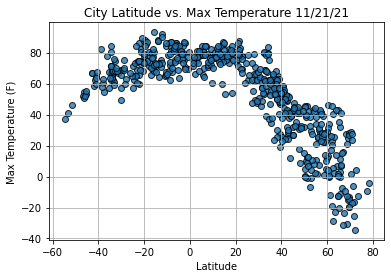

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

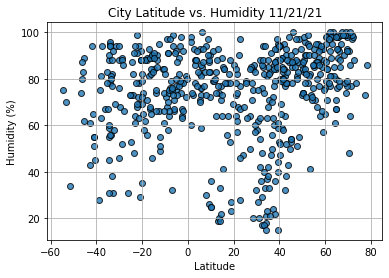

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

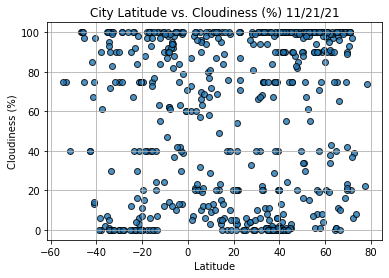

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

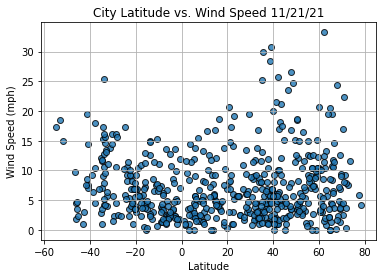

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

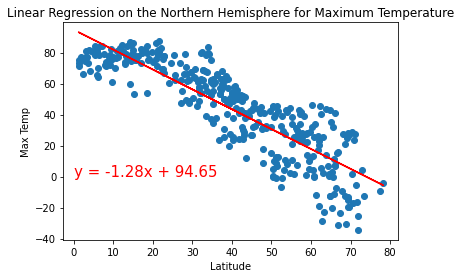

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,0))

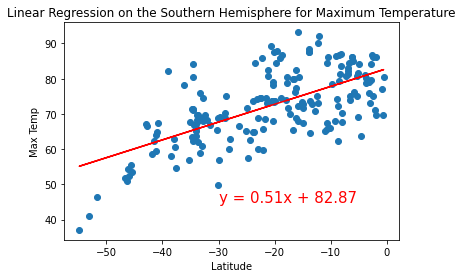

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-30,45))

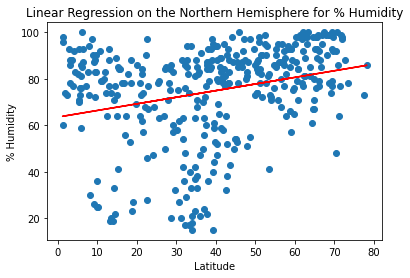

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

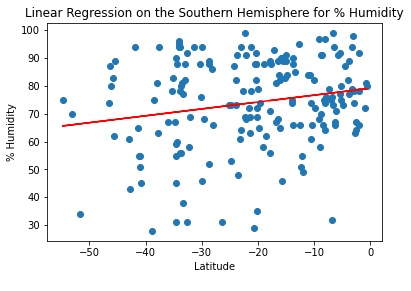

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-30,10))

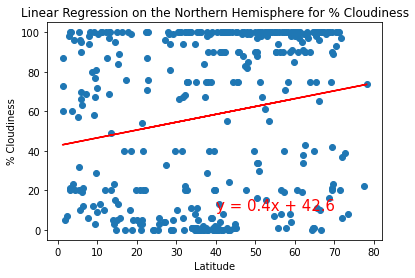

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

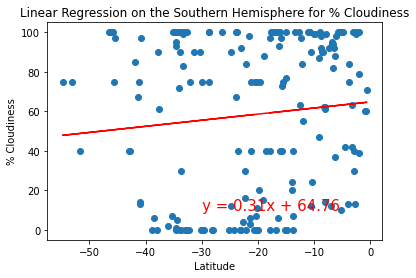

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-30,10))

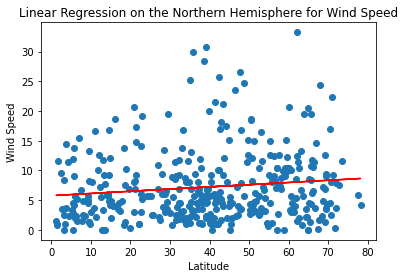

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,35))

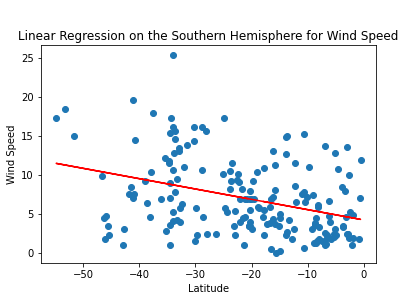

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,30))